In [1]:
## libreria de graficos personalizada
import plot_functions as _plot
import pandas as pd

EXTRACCION DE DATOS

In [2]:
domingo_24 = "24_01_2021 query_listado_notas_sin CSEX.xlsx"
viernes_22 = "22_01_2021 query_listado_notas_sin CSEX.xlsx"
con_facultad = "21_01_2021 query_listado_notas_sin CSEX.xlsx"
sin_csex  = "19_01_2021 query_listado_notas_sin CSEX.xlsx"
no_actualizado = '19_01_2021_SALIDA_ADVANCE.xls'

#advance_notas = open_excel(no_actualizado,'Sheet1')
df = _plot.open_excel(domingo_24,'Hoja1')

TRANSFORMACION DE DATOS

In [3]:
## Omite notas con NOTA_FINAL_BANNER = R
df = df[ df['NOTA_FINAL_BANNER'] != "R" ]

In [4]:
## unifica el nombre de las columnas y convierte a numero las que corresponden
df["NOTA_FINAL_BANNER"] = pd.to_numeric(df["NOTA_FINAL_BANNER"], downcast="float") ## convierto columna a float
df.rename(columns={'COURSE_ID':'course_id','USER_ID':'user_id','NOTA_FINAL_REAL': 'NOTA_FINAL_REAL_BB', 'EXAMEN_REAL': 'NOTA_EXAMEN_BB','NOTA_PRESENTACION_REAL':'NOTA_PRESENTACION_BB', 'NRC':'nrc'}, inplace=True)
df['USER_MAS_COURSE_ID'] = df['user_id'] + df['course_id']

## agrega columna DIFERENCIA_NOTAS
df['DIFERENCIA_NOTAS'] = round( df['NOTA_FINAL_BANNER'] - df['NOTA_FINAL_REAL_BB'], 1)

## reemplaza valores null por 0
df = df.fillna(0)

## visualizacion previa de datos
df.head(3)

,course_id,COURSE_NAME,CODIGO,PERIODO,nrc,METODO_EDUCATIVO,TIPO_HORARIO,RUT,user_id,cod_fac,facultad,NOTA_EXAMEN_BB,NOTA_PRESENTACION_BB,NOTA_FINAL_REAL_BB,EXAMEN_BANNER,NOTA_PRESENTACION_BANNER,NOTA_FINAL_BANNER,PROGRAMA,USER_MAS_COURSE_ID,DIFERENCIA_NOTAS
0,202025_1076_IAEA003,FUNDAM. DE CONTABILIDAD,IAEA003,202025,1076,EL,TEO,162113607,m.icazadonoso,ECOM,ECONOMÍA Y NEGOCIOS,0.0,0.0,6.0,0.0,6.0,6.0,UNAB32405-INGENIERÍA ADM. EMPRESAS,m.icazadonoso202025_1076_IAEA003,0.0
1,202025_1076_IAEA003,FUNDAM. DE CONTABILIDAD,IAEA003,202025,1076,EL,TEO,232299193,g.sosaverginella,ECOM,ECONOMÍA Y NEGOCIOS,0.0,0.0,5.5,0.0,5.5,5.5,UNAB32405-INGENIERÍA ADM. EMPRESAS,g.sosaverginella202025_1076_IAEA003,0.0
2,202025_1076_IAEA003,FUNDAM. DE CONTABILIDAD,IAEA003,202025,1076,EL,TEO,154473831,c.vergarapea1,ECOM,ECONOMÍA Y NEGOCIOS,0.0,0.0,5.7,0.0,5.7,5.7,UNAB32405-INGENIERÍA ADM. EMPRESAS,c.vergarapea1202025_1076_IAEA003,-0.0


In [5]:
## ELIMINA REGISTROS CON NOTA EXAMEN 0 o 1
def run(df):
    return df[ (df['EXAMEN_BANNER'] > 1) & (df['NOTA_EXAMEN_BB'] > 1)]
#df = run(df)

In [6]:
## OMITE EXIMIDOS
def run(df):
    EXIMICION_ING = 5
    EXIMICION_ECO = 5.5
    EXIMICION_EDU = 5.3

    ## se borran registros de alumnos EXIMIDOS
    return df[ ( (df['NOTA_PRESENTACION_BANNER'] < EXIMICION_ING) & (df['facultad'] == 'INGENIERÍA') )
                 | ( (df['NOTA_PRESENTACION_BANNER'] < EXIMICION_ECO) & (df['facultad'] == 'ECONOMÍA Y NEGOCIOS') )
                 | ( (df['NOTA_PRESENTACION_BANNER'] < EXIMICION_EDU) & (df['facultad'] == 'EDUCACIÓN Y CIENCIAS SOCIALES') )]
df = run(df)

In [7]:
## SE ELIMINAN REGISTROS CON NOTA EXAMEN 0 
def run(df):
    return df[ (df['EXAMEN_BANNER'] != 0) ]
df = run(df)

DEA

In [8]:
## FRECUENCIA CON QUE OCURREN DIFERENCIAS POR NOTA
x_axis = df[ df['DIFERENCIA_NOTAS'] != 0 ]['DIFERENCIA_NOTAS'] ## columna diferncia de nota donde no sea 0
title='# Alumnos por cada diferencia de nota'
x_label='diferencia en notas por punto (punto)'
y_label='numero de alumnos (#)'
x_max= 31
x_min = -11
y_max = 300
y_min = 0

#_plot.barplot_bins(x_axis, title, x_label, y_label, x_max, x_min, y_max, y_min)

In [9]:
## SCATTER CATEGORIZADO
## CATEGORIZADO 
#_plot.hue_scatterplot(df, 'NOTA_FINAL_BANNER','NOTA_FINAL_REAL_BB','facultad', size=10, alpha=0.6)

TOTAL Y NO EXIMIDOS

In [10]:
## TOTAL (sin R)
#df.groupby('facultad')['course_id'].count()
df.groupby('PROGRAMA')['course_id'].count()

PROGRAMA
UNAB31650-INGENIERÍA COMERCIAL              217
UNAB31720-CONTADOR AUDITOR                  105
UNAB32505-INGENIERIA INDUSTRIAL             326
UNAB35691-ING EN INFOR Y CONT DE GEST        25
UNAB35896-LICENCIATURA EN TRABAJO SOCIAL     57
Name: course_id, dtype: int64

In [11]:
## SIN EXIMIDOS
#df.groupby('facultad')['course_id'].count()
df[ df['DIFERENCIA_NOTAS'] != 0 ].groupby('PROGRAMA')['course_id'].count() / df.groupby('PROGRAMA')['course_id'].count()

PROGRAMA
UNAB31650-INGENIERÍA COMERCIAL              0.493088
UNAB31720-CONTADOR AUDITOR                  0.257143
UNAB32505-INGENIERIA INDUSTRIAL             0.536810
UNAB35691-ING EN INFOR Y CONT DE GEST       0.720000
UNAB35896-LICENCIATURA EN TRABAJO SOCIAL    0.087719
Name: course_id, dtype: float64

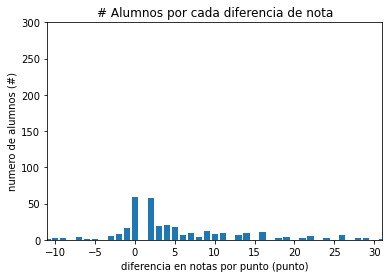

In [12]:
## FRECUENCIA CON QUE OCURREN DIFERENCIAS POR NOTA
x_axis = df[ df['DIFERENCIA_NOTAS'] != 0 ]['DIFERENCIA_NOTAS'] ## columna diferncia de nota donde no sea 0
title='# Alumnos por cada diferencia de nota'
x_label='diferencia en notas por punto (punto)'
y_label='numero de alumnos (#)'
x_max= 31
x_min = -11
y_max = 300
y_min = 0

_plot.barplot_bins(x_axis, title, x_label, y_label, x_max, x_min, y_max, y_min)

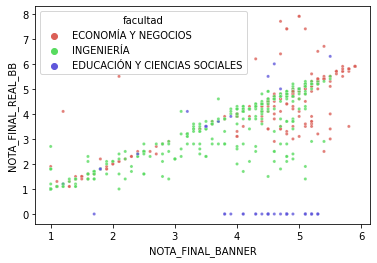

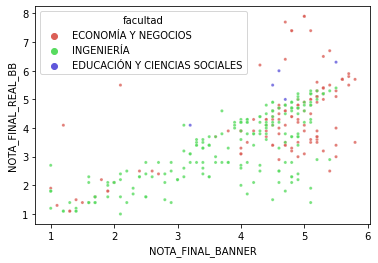

In [13]:
## SCATTER CATEGORIZADO

## filtra eximidos
## solo alumnos eximidos
EXIMICION_ING = 5
EXIMICION_ECO = 5.5
EXIMICION_EDU = 5.3

df_no_eximidos = df[ ( (df['NOTA_PRESENTACION_BANNER'] < EXIMICION_ING) & (df['facultad'] == 'INGENIERÍA') )
                 | ( (df['NOTA_PRESENTACION_BANNER'] < EXIMICION_ECO) & (df['facultad'] == 'ECONOMÍA Y NEGOCIOS') )
                 | ( (df['NOTA_PRESENTACION_BANNER'] < EXIMICION_EDU) & (df['facultad'] == 'EDUCACIÓN Y CIENCIAS SOCIALES') )][ df['DIFERENCIA_NOTAS'] != 0 ]

## CATEGORIZADO CON EXIMIDOS
_plot.hue_scatterplot(df, 'NOTA_FINAL_BANNER','NOTA_FINAL_REAL_BB','facultad', size=10, alpha=0.8)

## CATEGORIZADO SIN EXIMIDOS
_plot.hue_scatterplot(df_no_eximidos, 'NOTA_FINAL_BANNER','NOTA_FINAL_REAL_BB','facultad', size=10, alpha=0.8)



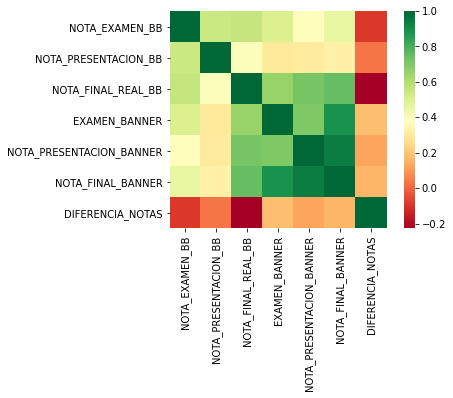

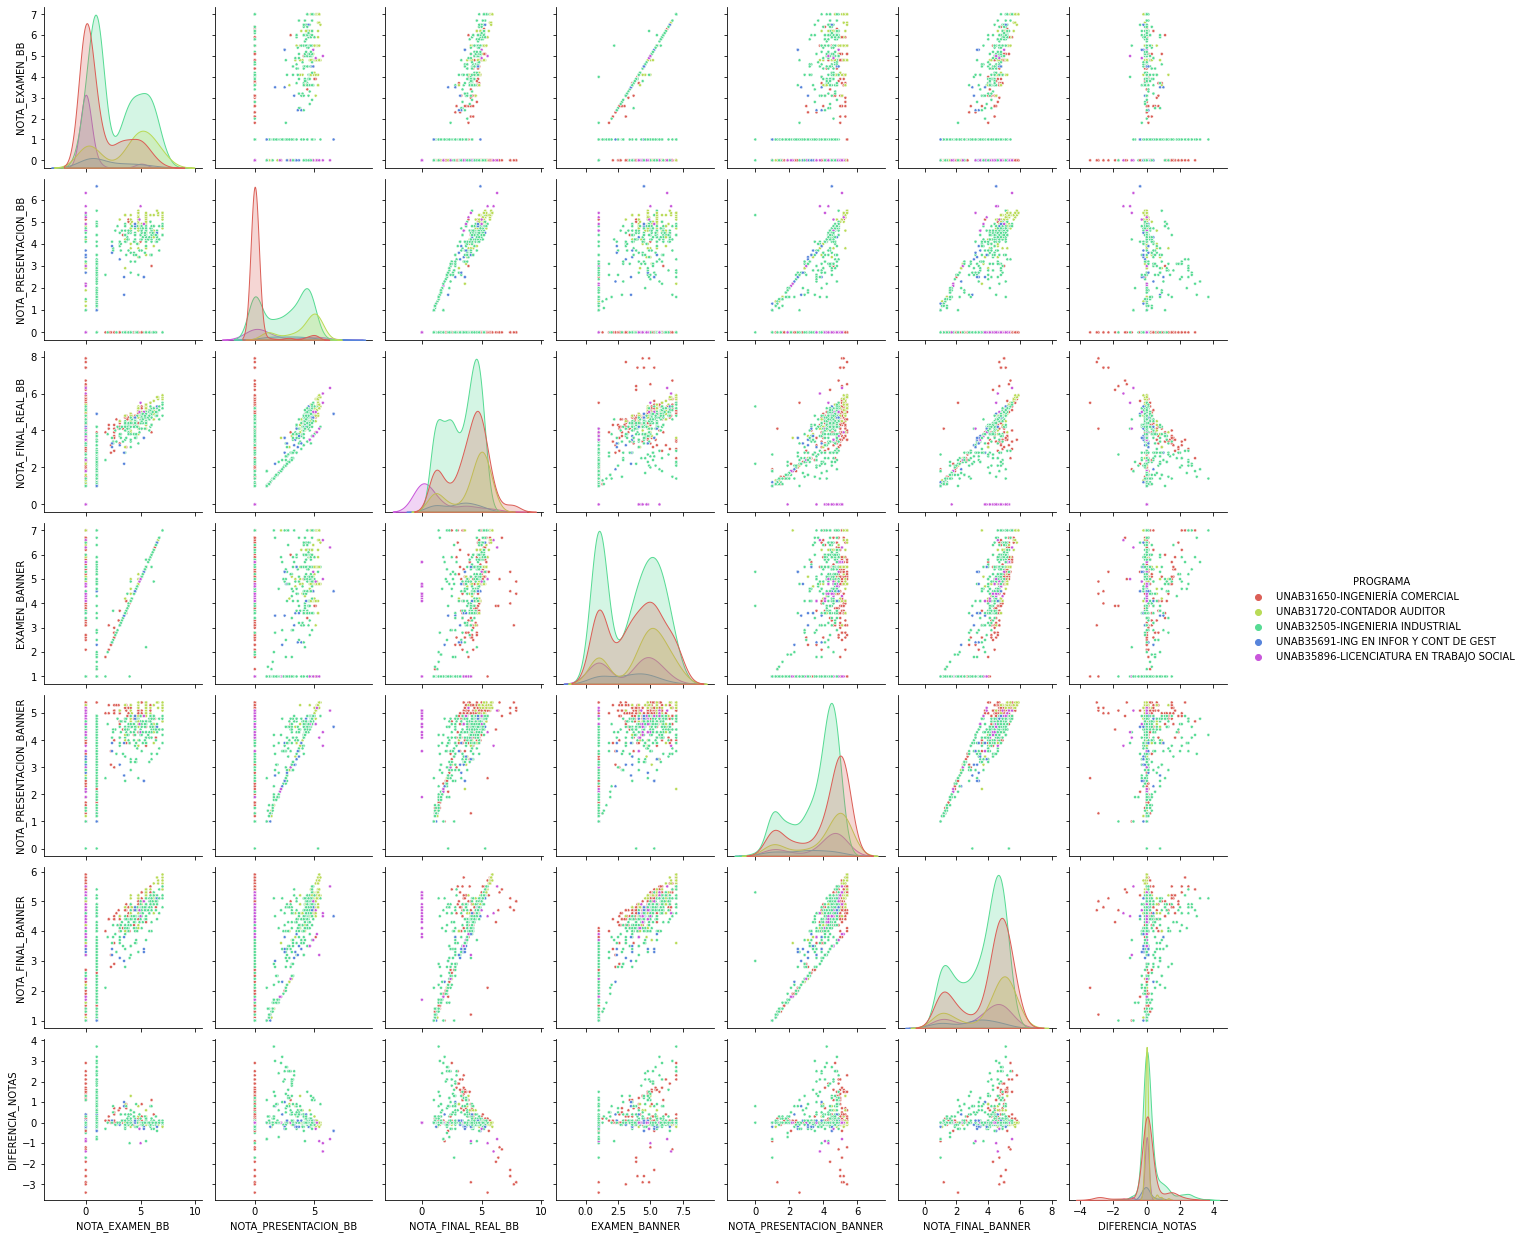

In [14]:
correlacionables = df[['NOTA_EXAMEN_BB','NOTA_PRESENTACION_BB','NOTA_FINAL_REAL_BB','EXAMEN_BANNER','NOTA_PRESENTACION_BANNER','NOTA_FINAL_BANNER','DIFERENCIA_NOTAS','PROGRAMA']]

## heatmap corr
_plot.corr_heatmap_plot(correlacionables)

## scatterplot corr
_plot.corr_trend_scatter_plot(correlacionables, category='PROGRAMA')

In [15]:
## DEBIERAN ESTAR APROBADOS
df[ (df['NOTA_FINAL_BANNER'] < 4) & (df['NOTA_FINAL_REAL_BB'] >= 4)  ][['course_id','nrc','RUT','user_id','NOTA_FINAL_BANNER','NOTA_FINAL_REAL_BB','DIFERENCIA_NOTAS']]

,course_id,nrc,RUT,user_id,NOTA_FINAL_BANNER,NOTA_FINAL_REAL_BB,DIFERENCIA_NOTAS
1145,202025_1166_ICAD503,1166,134950889,a.saldiasaraya,1.2,4.1,-2.9
1233,202025_1166_ICAD503,1166,93594304,m.mollcisterna,2.1,5.5,-3.4
1257,202025_1327_AIND0001,1327,126279701,e.leytonherrera,3.9,4.2,-0.3
1598,202025_1356_AIND1101,1356,153011419,d.arocaalvarado,3.1,4.1,-1.0
2028,202025_1382_AIND1204,1382,15602662K,e.aguirreespinoza,3.7,4.6,-0.9
2126,202025_1382_AIND1204,1382,157532049,y.montenegrogarrido,3.9,4.0,-0.1
2983,202025_1516_IICG1102,1516,17476879K,p.peailillominder,3.9,4.1,-0.2
3170,202025_1542_LTSO001,1542,145916194,m.campostapia1,3.2,4.1,-0.9


In [16]:
df[ (df['PROGRAMA'] == 'UNAB31650-INGENIERÍA COMERCIAL') & (df['NOTA_EXAMEN_BB'] == 0)].groupby('CODIGO')['user_id'].count()

#_plot.hue_scatterplot(serie, 'NOTA_FINAL_BANNER','NOTA_FINAL_REAL_BB','facultad', size=10, alpha=0.8)

CODIGO
ICAD103     2
ICAD203     9
ICAD204    26
ICAD302    21
ICAD303    19
ICAD304     3
ICAD503    11
ICAD601     3
ICAD602     9
ICAD603    17
ICAD801     1
Name: user_id, dtype: int64

In [17]:
df[ (df['PROGRAMA'] == 'UNAB31650-INGENIERÍA COMERCIAL') & (df['NOTA_EXAMEN_BB'] != 0)].groupby('CODIGO')['user_id'].count()

CODIGO
ICAD102    12
ICAD103    13
ICAD104    14
ICAD202    19
ICAD402    11
ICAD403     4
ICAD404     9
ICAD502     6
ICAD803     8
Name: user_id, dtype: int64

In [18]:
df.head()

,course_id,COURSE_NAME,CODIGO,PERIODO,nrc,METODO_EDUCATIVO,TIPO_HORARIO,RUT,user_id,cod_fac,facultad,NOTA_EXAMEN_BB,NOTA_PRESENTACION_BB,NOTA_FINAL_REAL_BB,EXAMEN_BANNER,NOTA_PRESENTACION_BANNER,NOTA_FINAL_BANNER,PROGRAMA,USER_MAS_COURSE_ID,DIFERENCIA_NOTAS
602,202025_1137_ICAD104,CONTABILIDAD I,ICAD104,202025,1137,EL,TEO,166838223,e.ali,ECOM,ECONOMÍA Y NEGOCIOS,3.1,0.0,4.2,3.1,4.6,4.2,UNAB31650-INGENIERÍA COMERCIAL,e.ali202025_1137_ICAD104,-0.0
603,202025_1137_ICAD104,CONTABILIDAD I,ICAD104,202025,1137,EL,TEO,168659784,g.santanacarrillo,ECOM,ECONOMÍA Y NEGOCIOS,3.7,0.0,4.7,3.7,5.1,4.7,UNAB31650-INGENIERÍA COMERCIAL,g.santanacarrillo202025_1137_ICAD104,-0.0
630,202025_1151_ICAD304,DERECHO Y EMPRESA,ICAD304,202025,1151,EL,TEO,17675155K,o.pachecocastillo,ECOM,ECONOMÍA Y NEGOCIOS,0.0,0.0,1.0,1.0,1.0,1.0,UNAB31650-INGENIERÍA COMERCIAL,o.pachecocastillo202025_1151_ICAD304,0.0
631,202025_1151_ICAD304,DERECHO Y EMPRESA,ICAD304,202025,1151,EL,TEO,187480027,v.quirozgonzalez,ECOM,ECONOMÍA Y NEGOCIOS,0.0,0.0,1.4,1.0,1.9,1.6,UNAB31650-INGENIERÍA COMERCIAL,v.quirozgonzalez202025_1151_ICAD304,0.2
636,202025_1137_ICAD104,CONTABILIDAD I,ICAD104,202025,1137,EL,TEO,164985105,r.garcesyancaman,ECOM,ECONOMÍA Y NEGOCIOS,1.0,0.0,1.6,1.0,1.9,1.7,UNAB31650-INGENIERÍA COMERCIAL,r.garcesyancaman202025_1137_ICAD104,0.1


#### 